# Part II - (Investigating Prosper Loans Dataset)
## by (SAUD ALMOTER)


## Investigation Overview


> In this investigation I will show what features or variables have a stronge relation with the borrower APR, and which type of borrowers tend to have amount delinqunet based on the income range and Employment status, also I am interested in figuring out the percentage of the borrowers who own houses and the number of Investors of those loans. 

## Dataset Overview

>  This is the Prosper Loan Data, this data set consists of 81 features and 113,937 record, Loan amount, loan status, lender yiled are some of the attributes of the data set, and many other.<br>
Data dictionary to understand the variables more form this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [21]:
data = pd.read_csv('prosperLoanData.csv')
data.head()
sub = ['Term','LoanStatus','IncomeRange','IsBorrowerHomeowner','EmploymentStatus',
'AmountDelinquent','TotalProsperLoans','Occupation','ProsperScore','LenderYield','ClosedDate',
'BorrowerAPR','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','Investors']
print(len(sub))
data.shape
data = data[sub]
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.shape

16


(8251, 16)

> The prosper score of the borrower have a stronge negative relation with the borrower annual percentage rate APR.<br> The lower the prosper score which means the lower risk score is the more percentage of the borrower APR. 

Text(0.5, 0.98, 'The relation between Prosper score and Borrwer APR')

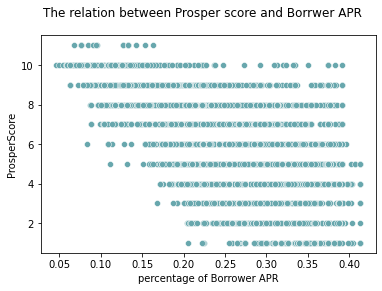

In [22]:
Visual1 = sb.scatterplot(data= data, x=data.BorrowerAPR,y=data.ProsperScore,
color = '#68A7AD').set_xlabel('percentage of Borrower APR')
Visual1.figure.suptitle('The relation between Prosper score and Borrwer APR')

> Surprisingly Employees with a high income rate are the most borrowers that have amount delinquent and retired borrowers regardeless the income have a lower amount delinquent amoung all borrowers.

Text(0.5, 0.98, 'relation between Income range and Amount delinquet')

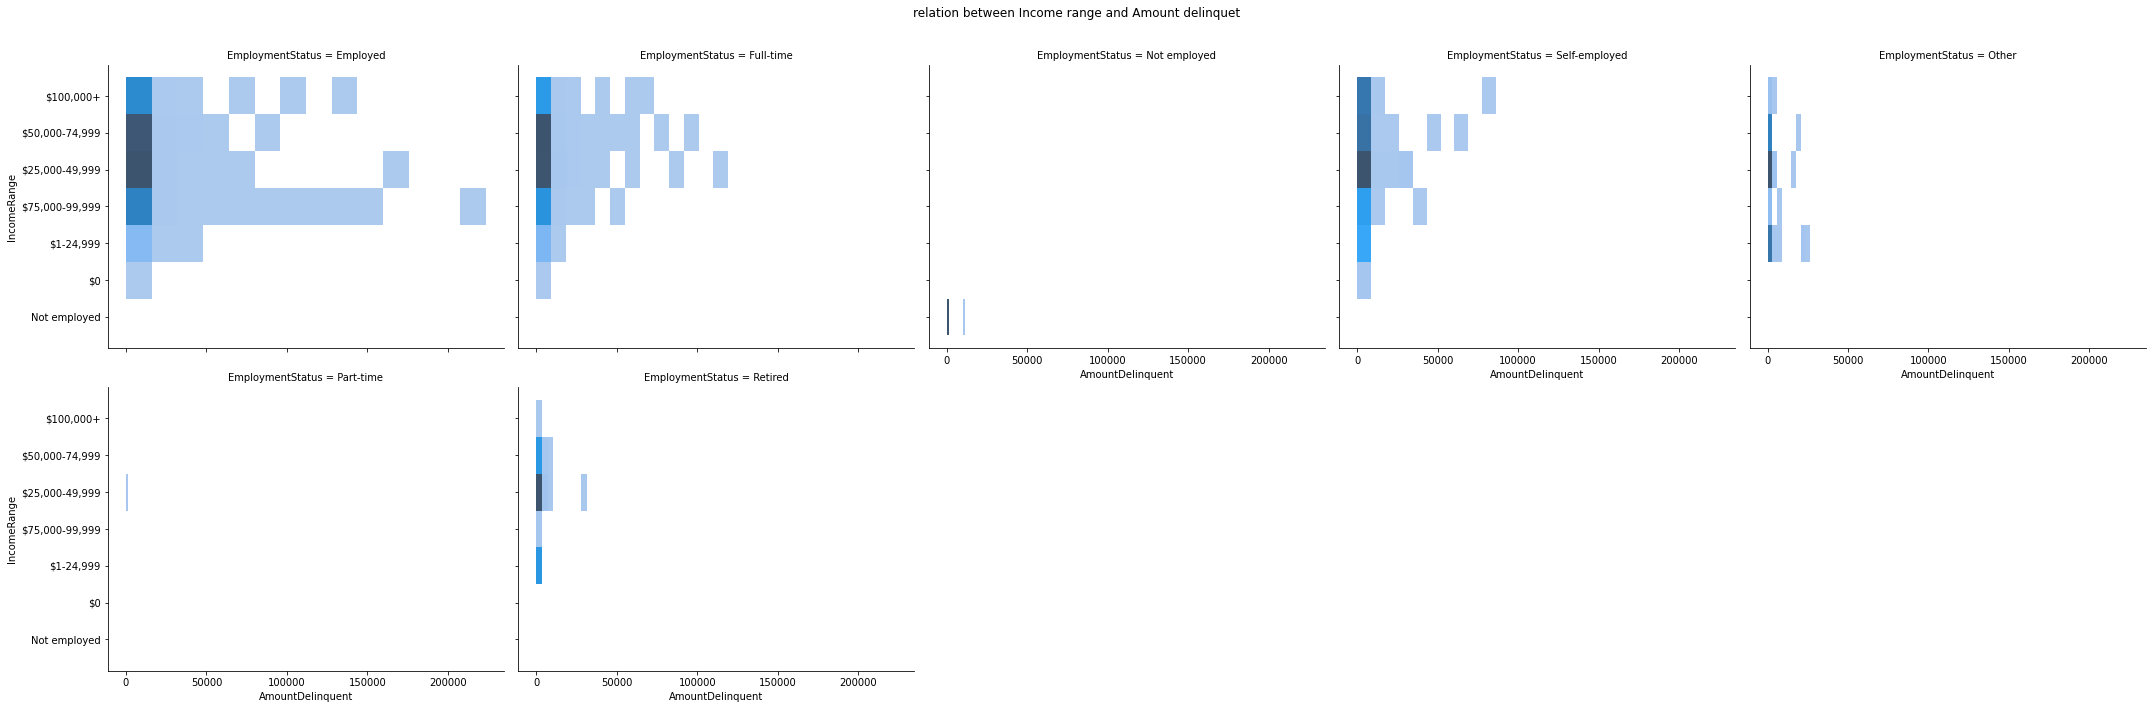

In [52]:
g=sb.FacetGrid(data=data, aspect=1.2, height=5,col='EmploymentStatus', col_wrap=5)
g.map(sb.histplot, 'AmountDelinquent','IncomeRange')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("relation between Income range and Amount delinquet")

> The average number of Investors for a home owner borrower is higher than when the borrower is a home owner.  



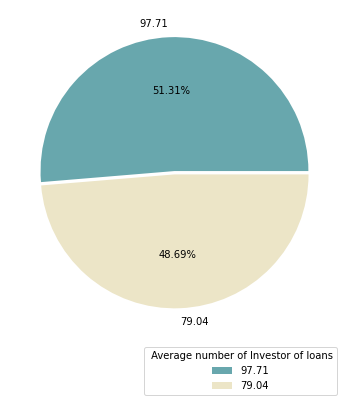

In [120]:
plt.pie(x=data.IsBorrowerHomeowner.value_counts(),
labels= np.flip(np.round(np.array(data.groupby(data.IsBorrowerHomeowner)['Investors'].mean()),2)),autopct='%1.2f%%',colors=['#68A7AD','#ECE5C7'],explode=[0.025,0])
plt.legend( bbox_to_anchor=(1,0), loc="best",title=" Average number of Investor of loans")
plt.subplots_adjust(top=10)


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [24]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 